<a href="https://colab.research.google.com/github/jeongaaaa/multicampus_25th/blob/master/5_pandas_index_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 피벗테이블 (pivot_table)
- 피벗테이블은 엑셀의 피벗테이블과 동일
- 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것을 의미함
- 왼쪽에 나타나는 인덱스를 행 인덱스, 상단에 나타나는 인덱스를 열 인덱스라고 부름

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://bit.ly/ds-korean-idol')

In [ ]:
df.head(15)

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [ ]:
# 빅히트 지민과 정국이 같은 소속사이고 혈액형도 같은 경우
# 평균값으로 표현
# doc ref : https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html 

# index는 행 인덱스
# columns는 열 인덱스
# values는 조회하고 싶은 값
pd.pivot_table(df, index='소속사', columns='혈액형', values='키')

혈액형,A,AB,B,O
소속사,,,,
RBW,162.1,NaN,NaN,NaN
YG,177.0,NaN,NaN,NaN
빅히트,175.8,178.0,NaN,176.60
스타크루이엔티,167.1,NaN,NaN,NaN
커넥트,180.0,NaN,NaN,NaN
판타지오,NaN,NaN,183.0,NaN
플레디스,NaN,175.0,NaN,179.15


In [ ]:
import numpy as np

In [ ]:
# aggfunc에는 추가 계산 옵션 (np.sum, np.mean) - 기본값은 평균
pd.pivot_table(df, index='그룹', columns='혈액형', values='브랜드평판지수', aggfunc=np.mean)

혈액형,A,AB,B,O
그룹,,,,
뉴이스트,NaN,3301654.0,NaN,4131964.5
마마무,7650928.0,NaN,NaN,NaN
방탄소년단,7865797.5,8073501.0,NaN,3747875.0
빅뱅,9916947.0,NaN,NaN,NaN
소녀시대,3918661.0,NaN,NaN,NaN
아스트로,NaN,NaN,3506027.0,NaN
아이들,NaN,NaN,4668615.0,NaN
핫샷,4036489.0,NaN,NaN,NaN


#2. GroupBy (그룹으로 묶어보기)
- groupby는 데이터를 그룹으로 묶어 분석할 때 활용
- 소속사별 키의 평균, 성별 키의 평균 등 특정, 그룹별 통계 및 데이터의 성질을 확인하고자 할 때 활용


In [ ]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [ ]:
df.groupby('소속사')

**groupby와 함께**

- count() - 갯수
- sum() - 합계
- mean() - 평균
- var() - 분산
- std() - 표준편차
- min()/max() - 최소값, 최대값

In [ ]:
# 소속사를 기준으로 데이터의 갯수를 확인
df.groupby('소속사').count()

,이름,그룹,성별,생년월일,키,혈액형,브랜드평판지수
소속사,,,,,,,
RBW,1,1,1,1,1,1,1
SM,1,1,1,1,0,1,1
YG,1,1,1,1,1,1,1
빅히트,5,5,5,5,5,5,5
스타크루이엔티,1,1,1,1,1,1,1
커넥트,1,0,1,1,1,1,1
큐브,1,1,1,1,0,1,1
판타지오,1,1,1,1,1,1,1
플레디스,3,3,3,3,3,3,3


산술통계는 **자동으로 산술통계가 가능한 열만** 출력됨

In [ ]:
df.groupby('그룹').mean()

,키,브랜드평판지수
그룹,,
뉴이스트,177.766667,3.855194e+06
마마무,162.100000,7.650928e+06
방탄소년단,176.560000,6.260169e+06
빅뱅,177.000000,9.916947e+06
소녀시대,NaN,3.918661e+06
아스트로,183.000000,3.506027e+06
아이들,NaN,4.668615e+06
핫샷,167.100000,4.036489e+06


In [ ]:
df.groupby('성별').sum()

,키,브랜드평판지수
성별,,
남자,2123.2,68599637
여자,162.1,16238204


In [ ]:
# 특정 열만 출력하기

df.groupby('혈액형')['키'].mean()

#3. Multi-Index (복합 인덱스)

##3-1. Multi-Index 적용
: 행 인덱스를 복합적으로 구성하고 싶은 경우에는 인덱스를 list로 만들어 줌

In [ ]:
df.groupby(['혈액형', '성별']).mean()

키     브랜드평판지수
혈액형 성별                     
A   남자  175.140  7591755.20
    여자  162.100  5784794.50
AB  남자  176.500  5687577.50
B   남자  183.000  3506027.00
    여자      NaN  4668615.00
O   남자  177.875  3939919.75

##3-2. Multi-Index DataFrame을 피벗 테이블로 변환
: Multi-Index로 된 데이터프레임을 피벗테이블 형태로 다시 변환

In [ ]:
# group index1 -> 혈액형, index2->성별
df2 = df.groupby(['혈액형', '성별']).mean()

In [ ]:
df2

키     브랜드평판지수
혈액형 성별                     
A   남자  175.140  7591755.20
    여자  162.100  5784794.50
AB  남자  176.500  5687577.50
B   남자  183.000  3506027.00
    여자      NaN  4668615.00
O   남자  177.875  3939919.75

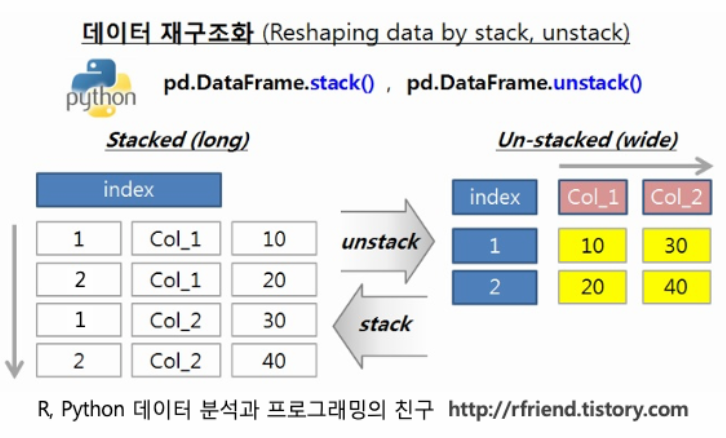

In [ ]:
# 데이터 재구조화
df2.unstack('혈액형')

키                           브랜드평판지수                        \
혈액형       A     AB      B        O          A         AB          B   
성별                                                                    
남자   175.14  176.5  183.0  177.875  7591755.2  5687577.5  3506027.0   
여자   162.10    NaN    NaN      NaN  5784794.5        NaN  4668615.0   

                 
혈액형           O  
성별               
남자   3939919.75  
여자          NaN

In [ ]:
df2.unstack('성별')

키            브랜드평판지수           
성별        남자     여자          남자         여자
혈액형                                       
A    175.140  162.1  7591755.20  5784794.5
AB   176.500    NaN  5687577.50        NaN
B    183.000    NaN  3506027.00  4668615.0
O    177.875    NaN  3939919.75        NaN

##3-3. 인덱스 초기화 (reset_index)
: reset_index() 는 Multi-Index로 구성된 데이터 프레임의 인덱스를 초기화해줌

In [ ]:
df2

키     브랜드평판지수
혈액형 성별                     
A   남자  175.140  7591755.20
    여자  162.100  5784794.50
AB  남자  176.500  5687577.50
B   남자  183.000  3506027.00
    여자      NaN  4668615.00
O   남자  177.875  3939919.75

In [ ]:
# index를 새로 매기기
df2 = df2.reset_index()

In [ ]:
df2

,혈액형,성별,키,브랜드평판지수
0,A,남자,175.140,7591755.20
1,A,여자,162.100,5784794.50
2,AB,남자,176.500,5687577.50
3,B,남자,183.000,3506027.00
4,B,여자,NaN,4668615.00
5,O,남자,177.875,3939919.75
